## Social distancing and sampling effect

## Background

This example tries to simulate a decent sized population with

1. Effect of increased social distancing following government guidelines.
2. Estimation of population incidence rate and seroprevalence through sampling.

## Assumptions

1. The population has size `popsize` in which everyone is equally susceptible.
2. Initial seroprevalence is `initial_seroprevalence`, with `initial_incidence_rate` active cases.
3. Incomplete social distancing in that while 80% of symptomatic cases are quarantined for 14-days, the rest of 20% of symptomatic cases are not, perhaps due to the mildness of symptoms.
4. Starting from day 15, stronger social distancing was adviced, which reduces the effective production number of everyone by `distancing`.
5. Although sampling in real world would be far less frequent, we sample `sample_size` individuals from the population every day to estimate the true incidence and seroprevalence of the population.

## Simulation of sampling

In [1]:
# this is a papermill parameter cell. 

# 50k population size
popsize = 50000
# 0.6% reported cases
initial_incidence_rate = 0.006
# assuming that seoprevalence is 5 times higher than incidence rate
initial_seroprevalence = 0.03
# effect of social distancing
distancing = 0.5
# 1% population size
sample_size = 500

This scenario can be simulated with the following command:

```
outbreak_simulator --popsize {popsize} --handle-symptomatic quarantine_14 0.8 --stop-if 't>45' --logfile distancing.log \
    --plugin init --at 0 --seroprevalence {seroprevalance} --incidence-rate {incidence_rate} --leadtime any \
    --plugin sample --interval 1 --size {sample_size} \
    --plugin stat --interval 1 \
    --plugin setparam --at 15 --symptomatic-r0 {1.4 * distancing} {2.8 * distancing} --asymptomatic-r0 {0.28 * distancing} {0.56 * distancing} \
    > distancing.txt
```

where plugins `init` and `sample` are used to initialize and sample from the population, `setparam` is used to set $R_0$ for sympatomatic and asymptomatic cases at day 15, and `stat` is to report true population incidence rate and seroprevalence every day.

In [2]:
%expand
outbreak_simulator --popsize {popsize} --handle-symptomatic quarantine_14 0.8 \
    --stop-if 't>45' --repeat 10 --logfile distancing.log \
    --plugin init --at 0 --leadtime any --seroprevalence {initial_seroprevalence} --incidence-rate {initial_incidence_rate} \
    --plugin setparam --at 15 --symptomatic-r0 {1.4 * distancing} {2.8 * distancing} --asymptomatic-r0 {0.28 * distancing} {0.56 * distancing} \
    --plugin sample --interval 1 --size {sample_size} \
    --plugin stat --interval 1 \
    > distancing.txt

100%|███████████████████████████████████████████| 10/10 [01:08<00:00,  6.81s/it]



## Results

Although a large number of statistics such as number of affected, recovered, seroprevalence are reported, we extract the following statistics from the output of the simulations (`distancing.txt`) for this report:

1. `incidence_rate_0.00` to `incidence_rate_45.00` as population incidence rate for 10 replicate simulations.
2. `sample_incidence_rate_0.00` to `sample_incidence_rate_45.00` as sample incidence rate for 10 replicate simulations.

In [3]:
import pandas as pd
def get_seq(filename, field_name):
    result = {}
    with open(filename) as stat:
        for line in stat:
            if line.startswith(field_name):
                key, value = line.strip().split('\t')
                t = int(key[len(field_name)+1:].split('.')[0])
                if ':' in value:
                    value = eval('{' + value + '}')
                else:
                    value = {idx+1:value for idx, value in enumerate(eval(value))}
                result[t] = value
               
    return pd.DataFrame(result).transpose()[[x for x in range(1, 11)]]

In [4]:
%preview incidence_rate
incidence_rate = get_seq('distancing.txt', 'incidence_rate')
sample_incidence_rate = get_seq('distancing.txt', 'sample_incidence_rate')

>>> incidence_rate:

,1,2,3,4,5,6,7,8,9,10
0,0.0060,0.0060,0.0060,0.0060,0.0060,0.0060,0.0060,0.0060,0.0060,0.0060
1,0.0056,0.0057,0.0055,0.0058,0.0058,0.0057,0.0059,0.0057,0.0059,0.0057
2,0.0056,0.0055,0.0053,0.0057,0.0058,0.0055,0.0059,0.0058,0.0058,0.0056
3,0.0057,0.0054,0.0054,0.0055,0.0058,0.0057,0.0060,0.0058,0.0058,0.0057
4,0.0055,0.0056,0.0053,0.0052,0.0057,0.0059,0.0061,0.0057,0.0060,0.0059
5,0.0059,0.0055,0.0053,0.0050,0.0058,0.0060,0.0060,0.0058,0.0061,0.0060
6,0.0059,0.0057,0.0059,0.0054,0.0058,0.0060,0.0063,0.0061,0.0063,0.0065
7,0.0062,0.0057,0.0063,0.0052,0.0058,0.0064,0.0066,0.0060,0.0064,0.0068
8,0.0067,0.0058,0.0066,0.0055,0.0060,0.0065,0.0069,0.0063,0.0067,0.0072
9,0.0071,0.0059,0.0071,0.0055,0.0059,0.0067,0.0072,0.0065,0.0069,0.0077


The following figure shows the change of incidence rate for 10 replicate simulations. As you can see, the incidence rates increase rapidly at first. After day 15, due to the increase of social distancing, reflected by lowered production number, the population incidence rates start to decline after a few days of lag. 

<AxesSubplot:xlabel='days', ylabel='incidence rate'>

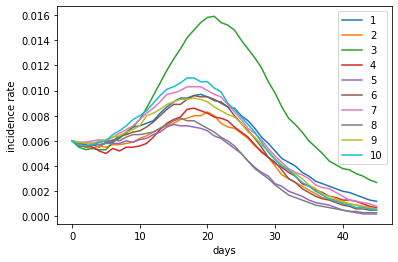

In [5]:
incidence_rate.plot(xlabel='days', ylabel='incidence rate')

The following figure shows sample incidence rates from 3 of the simulations, estimated from sampling 10% of the population (~ 500 people). Due to the overall low incidence rate, the estimates from the samples vary greatly.

<AxesSubplot:xlabel='days', ylabel='sample incidence rate'>

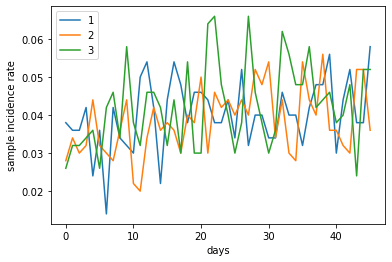

In [7]:
sample_incidence_rate[[1, 2, 3]].plot(xlabel='days', ylabel='sample incidence rate')

## Availability

This notebook is available under the `Applications` directory of the [GitHub repository](https://github.com/ictr/covid19-outbreak-simulator) of the COVID19 Outbreak Simulator. It can be executed with [`sos-papermill`](https://github.com/vatlab/sos-papermill) with the following parameters, or using a docker image `bcmictr/outbreak-simulator-notebook` as described in [here](/covid19-outbreak-simulator/docs/cli/).